In [1]:
import numpy as np
import pandas as pd


data = np.array([
    [27, 29, 95, 0.5],
    [30, 32, 110, 0.9],
    [33, 35, 150, 13],
    [28, 30, 105, 1.3]
])

models = ["GPT-2", "T5-base", "LLaMA-2", "GPT-Neo"]

weights = np.array([0.35, 0.30, 0.20, 0.15])
criteria_type = np.array(["benefit", "benefit", "cost", "cost"])


norm = data / np.sqrt((data**2).sum(axis=0))


weighted = norm * weights


ideal_best = np.zeros(weighted.shape[1])
ideal_worst = np.zeros(weighted.shape[1])

for i in range(len(criteria_type)):
    if criteria_type[i] == "benefit":
        ideal_best[i] = weighted[:, i].max()
        ideal_worst[i] = weighted[:, i].min()
    else:
        ideal_best[i] = weighted[:, i].min()
        ideal_worst[i] = weighted[:, i].max()


S_plus = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
S_minus = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))


C = S_minus / (S_plus + S_minus)

result = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": C
}).sort_values(by="TOPSIS Score", ascending=False)

print(result)


     Model  TOPSIS Score
1  T5-base      0.844881
3  GPT-Neo      0.777462
0    GPT-2      0.767942
2  LLaMA-2      0.232058


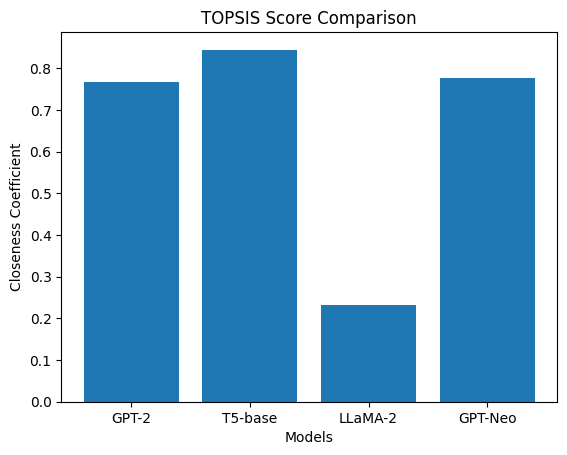

In [2]:
import matplotlib.pyplot as plt

plt.bar(models, C)
plt.title("TOPSIS Score Comparison")
plt.xlabel("Models")
plt.ylabel("Closeness Coefficient")
plt.show()
